<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Math</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)"> Finite difference approximation of the scalar wave equation </div>
        </div>
    </div>
</div>


---

This notebook is based on  finite difference methods  


##### Authors:
* Kenneth Duru

## Introduction ##

Consider the scalar advection equation in 1D 

\begin{align}
\frac{\partial v(x,t)}{\partial t} + c \frac{\partial v(x,t)}{\partial x}  = 0. 
\end{align}

Here, $c \equiv 1$ is the velocity at which the quantity of interest $v(x,t)$ is advected through the domain $x \in [0, L]$. 
To keep the problem simple, we use homogeneous initial data

\begin{equation}
v(x,0)  = 0.
\end{equation}

Dirichlete boundary conditions $v(0,t) = g(t)$.

\begin{equation*}
\begin{split}
& g(t)= \left \{
\begin{array}{rl}
\sin^4(\pi/2  t)) \quad {}  \quad {}& \text{if} \quad t\le  2 ,\\
0 \quad {}  \quad {}& \text{if} \quad t >  2.
\end{array} \right.
\end{split}
\end{equation*}

The IBVP has the exact solution 
$$
v(x,t)=g(t-x/c)
$$
 
Our goal is to construct finite difference approximation of the IBVP

**** Steps ****

1) Discretise the domain

2) Discretise the PDE (in space).

3) Discretise the boundary condition

4) Integrate in time (using Euler or RK2)

*** Details will be provided in class ***

In [2]:
# Parameters initialization and plotting the simulation
# Import necessary routines
import numpy as np
import matplotlib.pyplot as plt
import timeit

plt.switch_backend("nbagg")           # plots within this notebook

In [2]:
# FUNCTION decimal range step value  
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step

In [3]:
# Implement the finite difference approximation for the first derivatives du/dx

def d_x(u, nx, dx, order):
    
    
    # finite difference approximation for the first derivatives du/dx
    
    # initialise the derivative vector
    ux = 0*u
    # second order accurate case
    if order==2:
        
        # consider first the endpoints
        ux[0] = (u[1] -  u[0])/dx                               # at x_0 = 0
        ux[nx-1] = (u[nx-1] -  u[nx-2])/dx                      # at x_N = L  

        # interior points x_j (j = 1, 2, ... N-1)
        for j in range(1, nx-1):
            ux[j] = (u[j+1] -  u[j-1])/(2.0*dx)
            
            
    # fourth order accurate case        
    if order==4:
        ################################################# 
        # calculate partial derivatives on the boundaries:(0,1,2,3, : nx-4, nx-3, nx-2, nx-1)
        # with one-sided difference operators
        
        ux[0] = -24./17*u[0] + 59./34*u[1]  - 4./17*u[2] - 3./34*u[3]
        ux[1] = -1./2*u[0] + 1./2*u[2] ;
        ux[2] = 4./43*u[0] - 59./86*u[1]  + 59./86*u[3] - 4./43*u[4]
        ux[3] = 3./98*u[0] - 59./98*u[2]  + 32./49*u[4] - 4./49*u[5]


        ux[nx-1] = 24./17*u[nx-1] - 59./34*u[nx-2]  + 4./17*u[nx-3] + 3./34*u[nx-4]
        ux[nx-2] = 1./2*u[nx-1] - 1./2*u[nx-3] ;
        ux[nx-3] = -4./43*u[nx-1] + 59./86*u[nx-2]- 59./86*u[nx-4]+ 4./43*u[nx-5]
        ux[nx-4] = -3./98*u[nx-1] + 59./98*u[nx-3]- 32./49*u[nx-5]+ 4./49*u[nx-6]
    
        # interior points x_j (j = 4, ... nx-5)     
        #------------------------------------------------------------------------------------------------------------------------------
        for j in range(4, nx-4):
            ux[j] = 1./12*u[j-2] - 2./3*u[j-1] + 2./3*u[j+1] - 1./12*u[j+2]

        ux[:] = ux/dx
        
    if order==6:
        m = nx - 1
    # calculate partial derivatives on the boundaries:(0,1,2,3,4,5,6 : m-6, m-5, m-4, m-3, m-2, m-1, m)
    # with one-sided difference operators 
        ux[0] = -1.694834962162858*u[0] + 2.245634824947698*u[1] - 0.055649692295628*u[2] - 0.670383570370653*u[3]\
            - 0.188774952148393*u[4] + 0.552135032829910*u[5] - 0.188126680800077*u[6]
        
        ux[1] = -0.434411786832708*u[0] + 0.107043134706685*u[2] + 0.420172642668695*u[3] + 0.119957288069806*u[4]\
            - 0.328691543801578*u[5] + 0.122487487014485*u[6] - 0.006557221825386*u[7]
        
        ux[2] = 0.063307644169533*u[0] - 0.629491308812471*u[1] + 0.809935419586724*u[3] - 0.699016381364484*u[4]\
            + 0.850345731199969*u[5] - 0.509589652965290*u[6] + 0.114508548186019*u[7]
        
        ux[3] = 0.110198643174386*u[0] - 0.357041083340051*u[1] - 0.117033418681039*u[2] + 0.120870009174558*u[4]\
            + 0.349168902725368*u[5] - 0.104924741749615*u[6] - 0.001238311303608*u[7]
        
        ux[4] = 0.133544619364965*u[0] - 0.438678347579289*u[1] + 0.434686341173840*u[2] - 0.520172867814934*u[3]\
            + 0.049912002176267*u[5] + 0.504693510958978*u[6] - 0.163985258279827*u[7]
        
        ux[5] = -0.127754693486067*u[0] + 0.393149407857401*u[1] - 0.172955234680916*u[2] - 0.491489487857764*u[3]\
            - 0.016325050231672*u[4] + 0.428167552785852*u[6] - 0.025864364383975*u[7] + 0.013071869997141*u[8]
        
        ux[6] = 0.060008241515128*u[0] - 0.201971348965594*u[1] + 0.142885356631256*u[2] + 0.203603636754774*u[3]\
            - 0.227565385120003*u[4] - 0.590259111130048*u[5] + 0.757462553894374*u[7] - 0.162184436527372*u[8]\
            + 0.018020492947486*u[9]
        
        ux[7] = 0.009910488565285*u[1] - 0.029429452176588*u[2] + 0.002202493355677*u[3] + 0.067773581604826*u[4]\
            + 0.032681945726690*u[5] - 0.694285851935105*u[6] + 0.743286642396343*u[8] - 0.148657328479269*u[9]\
            + 0.016517480942141*u[10]

        ux[m-7] =-0.016517480942141*u[m-10] + 0.148657328479269*u[m-9] - 0.743286642396343*u[m-8] + 0.694285851935105*u[m-6]\
            - 0.032681945726690*u[m-5] - 0.067773581604826*u[m-4] - 0.002202493355677*u[m-3] + 0.029429452176588*u[m-2]\
            - 0.009910488565285*u[m-1]

        ux[m-6] =-0.018020492947486*u[m-9] + 0.162184436527372*u[m-8] - 0.757462553894374*u[m-7] + 0.590259111130048*u[m-5]\
            + 0.227565385120003*u[m-4] - 0.203603636754774*u[m-3] - 0.142885356631256*u[m-2] + 0.201971348965594*u[m-1]\
            - 0.060008241515128*u[m]

        ux[m-5] =-0.013071869997141*u[m-8] + 0.025864364383975*u[m-7] - 0.428167552785852*u[m-6] + 0.016325050231672*u[m-4]\
            + 0.491489487857764*u[m-3] + 0.172955234680916*u[m-2] - 0.393149407857401*u[m-1] + 0.127754693486067*u[m]

        ux[m-4] = 0.163985258279827*u[m-7] - 0.504693510958978*u[m-6] - 0.049912002176267*u[m-5] + 0.520172867814934*u[m-3]\
            - 0.434686341173840*u[m-2] + 0.438678347579289*u[m-1] - 0.133544619364965*u[m]

        ux[m-3] = 0.001238311303608*u[m-7] + 0.104924741749615*u[m-6] - 0.349168902725368*u[m-5] - 0.120870009174558*u[m-4]\
            + 0.117033418681039*u[m-2] + 0.357041083340051*u[m-1] - 0.110198643174386*u[m]

        ux[m-2] =-0.114508548186019*u[m-7] + 0.509589652965290*u[m-6] - 0.850345731199969*u[m-5] + 0.699016381364484*u[m-4]\
            - 0.809935419586724*u[m-3] + 0.629491308812471*u[m-1] - 0.063307644169533*u[m]

        ux[m-1] = 0.006557221825386*u[m-7] - 0.122487487014485*u[m-6] + 0.328691543801578*u[m-5] - 0.119957288069806*u[m-4]\
            - 0.420172642668695*u[m-3] - 0.107043134706685*u[m-2] + 0.434411786832708*u[m]

        ux[m]   = 0.188126680800077*u[m-6] - 0.552135032829910*u[m-5] + 0.188774952148393*u[m-4] + 0.670383570370653*u[m-3]\
            + 0.055649692295628*u[m-2] - 2.245634824947698*u[m-1] + 1.694834962162858*u[m]
        
        for i in range(8, m-7):
            ux[i] = -0.016666666666667*u[i-3] + 0.15*u[i-2] - 0.75*u[i-1] + 0.75*u[i+1] - 0.15*u[i+2] + 0.016666666666667*u[i+3]
    
        ux[:] = ux[:]/dx

            
            
    return ux


In [4]:
# Compute the RHS:  -cdu/dx + SAT
def rate(u, nx, dx, dt, order, c, t, x):

    # set penalty parameter
    if order == 2:
        tau = 1./(0.5 * dx)
    if order == 4:
        tau = 1./((17.0 / 48.0) * dx)    
    if order==6:
        tau = 1./((13649.0 / 43200.0) * dx)  
        
    #  compute numerical derivative of u 
    r = -c*d_x(u, nx, dx, order)
    
    
    # penalize the boundary term
    r[0] = r[0]- tau*(u[0]-g(t))
    
    return r

In [5]:
# consider the boundary forcing
def g(t):

    import numpy as np
    
    g0 = 0.0

    if t <= 2.0 and t >= 0.0:
        g0 = (np.sin(np.pi/2 * t)) ** 4
        
    
    return g0


In [6]:
# set domain parameters
L = 10.0                               # length of the domain (km)
c = 1.0                                # wavespeed (m/s)
t = 0.0                                # initial time
tend = 6.5                              # final time
iplot = 100



# set discretisation parameters
nx = 101                                # number of gridpoints

# discretize the domain into nx grid points
x = np.linspace(0, L, nx)              # discrete domain
dx = x[1]-x[0]                         # spatial step                        

order = 6                              # order of accuracy: 2 or 4.    


In [7]:
# verify accuracy: test against u(x) = x, 1/2*x**2.
# print(d_x(x, nx, dx, order))

In [8]:
#Initialize the arrays holding the functions functions
u = 0*x # numerical solution 

U = 0*x # exact solution 


In [9]:
# Initialize animated plot 


In [10]:
# Time stepping parameters
cfl = 0.5                         # CFL number
dt = cfl/c*dx                     # Time step
nt = int(round(tend/dt))          # number of time steps
n = 0                             # counter
t=0 
#method = "Euler"
#method = "RK2"
method = "RK4"




-----------------------------------------------

<IPython.core.display.Javascript object>


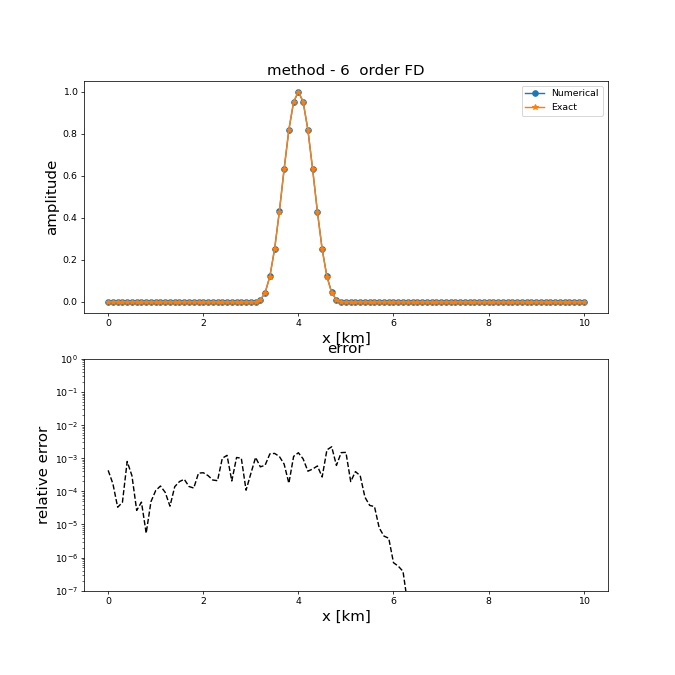

max absolute error =  0.0069481692329529995
relative error =  0.002971162141146745


<IPython.core.display.Javascript object>


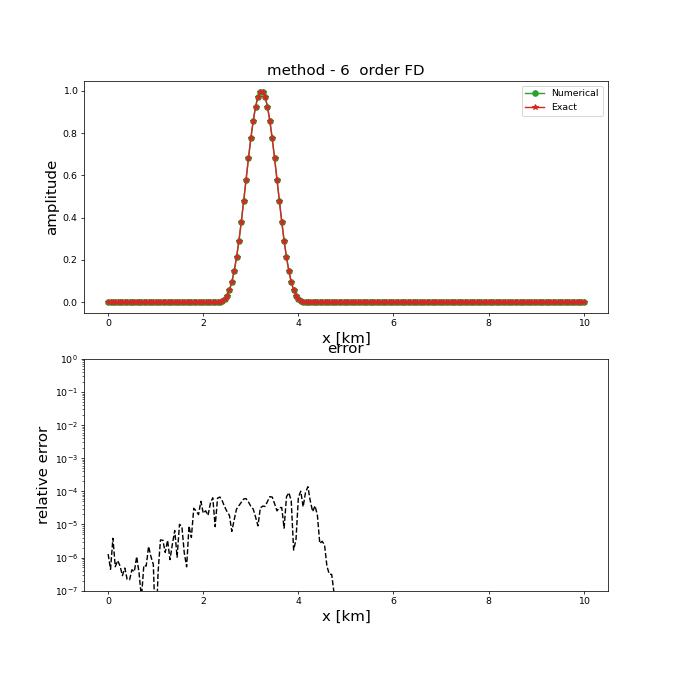

max absolute error =  0.0005154106245728506
relative error =  0.00015584552408002728


<IPython.core.display.Javascript object>


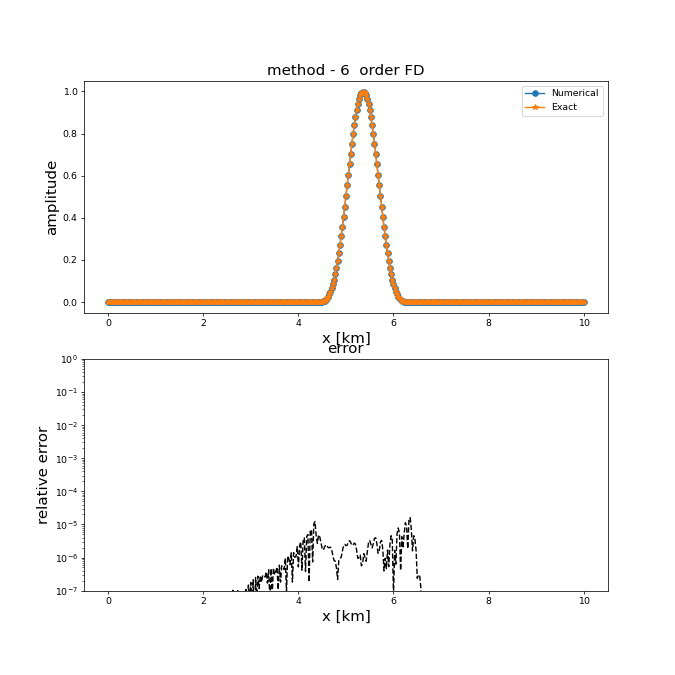

max absolute error =  4.2241151574448005e-05
relative error =  9.031538103678348e-06


<IPython.core.display.Javascript object>

max absolute error =  4.018451234350499e-06
relative error =  6.075327212418261e-07


<IPython.core.display.Javascript object>


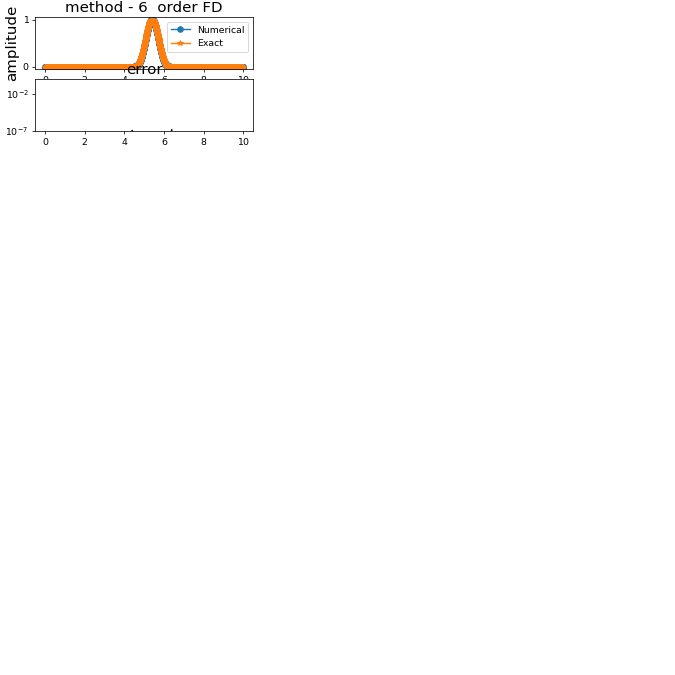

max absolute error =  4.001793583481577e-07
relative error =  4.27809729199383e-08


In [11]:
# initialise timer
start = timeit.default_timer()

# loop in time
for i in range(5):
    
    nx = [101,201,401,801,1601]
    x = np.linspace(0, L, nx[i])
    dx = x[1]-x[0]
    dt = cfl/c*dx  
    u =  0 * x
    U = 0*x
    
    fig1 = plt.figure(figsize=(10,10))
    ax1 = fig1.add_subplot(2,1,1)
    line1 = ax1.plot(x, U, 'r', x, u, 'k--', lw=1.5)
    plt.title('method - %s  order FD'%order, size=16)
    ax1.legend(('Analytical', 'Numerical'))
    plt.xlabel('x [km]', size=16)
    plt.ylabel('amplitude', size=16)


    # Initialize relative error plot 
    ax2 = fig1.add_subplot(2,1,2)
    line2 = ax2.plot(x,np.abs(U-u), 'k--', lw=1.5)
    plt.title('error', size=16)
    plt.xlabel('x [km]', size=16)
    plt.ylabel('relative error', size=16)
    ax2.set_ylim([10**-7, 1])
    plt.yscale("log")
    #plt.yscale("log", nonposx='clip') 

   # plt.ion()                                                       # set interective mode
    #plt.show()

    #np.zeros(nx)  #0*x # numerical solution 

     
    
    for t in drange(0, tend, dt):
        
        n = n+1

        #forward Euler
        if method == "Euler":
            u = u + dt*rate(u, nx[i], dx, dt, order, c, t, x)

        # RK2
        if method == "RK2":
            # compute predictor
            k1 = u + dt/2*rate(u, nx[i], dx, dt, order, c, t, x)

            # corrector
            u = u + dt*rate(u+dt/2*k1, nx[i], dx, dt, order, c, t+0.5*dt, x)


        # RK4
        if method == "RK4":
            # compute predictor (RK-stages)
            k1 = rate(u, nx[i], dx, dt, order, c, t, x)
            k2 = rate(u+dt/2*k1, nx[i], dx, dt, order, c, t+0.5*dt, x)
            k3 = rate(u+dt/2*k2, nx[i], dx, dt, order, c, t+0.5*dt, x)
            k4 = rate(u+dt*k3, nx[i], dx, dt, order, c, t+dt, x)

            # corrector
            u = u + dt/6*(k1 + 2*k2 + 2*k3 + k4)


        # Exact solution
        #U=np.exp(-(((x-c*(t+dt)-x0)/delta)**2))
        for j in range(nx[i]):
            U[j]=g(t+dt-x[j]/c) 

        if n % iplot == 0: 
            for l in line1:
                l.remove()
                del l               
            for l in line2:
                l.remove()
                del l


            # Display lines
            line1 = ax1.plot(x, u, '-o',x, U, '-*', lw=1.5)
            ax1.legend(iter(line1),('Numerical', 'Exact'))
            line2 = ax2.plot(x, np.abs(U-u), 'k--', lw=1.5)             
            #
            plt.gcf().canvas.draw()
    print('max absolute error = ',  np.sqrt(np.sum(np.abs(U-u)** 2)) )
    print('relative error = ',  np.sqrt(np.sum(np.abs(U-u)** 2))/ np.sqrt(np.sum(np.abs(U)** 2)))#np.max(np.abs(U-u)**2))

    #plt.ioff()
    #plt.show()

In [12]:
# Simulation end time
stop = timeit.default_timer()


print('total simulation time = ', stop - start, 's')            # print the time required for simulation
print('spatial order  of accuracy = ', order)                   # print the polynomial degree used
print('number of grid points = ', nx)                           # print the degree of freedom
print('uniform spatial step = ', dx, 'km')                      # print the spatial step

print('maximum relative error = ', np.max(np.abs(U-u))/np.max(np.abs(U)))             # print the max. relative error
print('log2 max relative error = ', np.log2(np.max(np.abs(U-u))/np.max(np.abs(U))))    # print the log2 of max. relative error





total simulation time =  196.8630448 s
spatial order  of accuracy =  6
number of grid points =  [101, 201, 401, 801, 1601]
uniform spatial step =  0.00625 km
maximum relative error =  1.4463000681892785e-07
log2 max relative error =  -22.72112976062427


In [4]:
def log2_error(val_1,val_2):
    return np.log2(val_1/val_2)

-log2_error(4.27809729199383e-08,6.075327212418261e-07)

3.82792091565607